# Data format example

In [1]:
import pypesto
import amici
import petab

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Manage PETAB model

In [2]:
folder_base = "/home/yannik/benchmark-models/hackathon_contributions_new_data_format/"
model_name = "Zheng_PNAS2012"

manager = petab.Manager.from_folder(folder_base + model_name)

# print(petab.lint.check_measurement_df(manager.measurement_df))
manager.map_par_sim_to_par_opt()


[['inflowp',
  'k00_01',
  'k00_10',
  'k01_00',
  'k01_02',
  'k01_11',
  'k02_01',
  'k02_03',
  'k02_12',
  'k03_02',
  'k03_13',
  'k10_00',
  'k10_11',
  'k10_20',
  'k11_01',
  'k11_10',
  'k11_12',
  'k11_21',
  'k12_02',
  'k12_11',
  'k12_13',
  'k12_22',
  'k13_03',
  'k13_12',
  'k13_23',
  'k20_10',
  'k20_21',
  'k20_30',
  'k21_11',
  'k21_20',
  'k21_22',
  'k21_31',
  'k22_12',
  'k22_21',
  'k22_23',
  'k22_32',
  'k23_13',
  'k23_22',
  'k30_20',
  'k30_31',
  'k31_21',
  'k31_30',
  'k31_32',
  'k32_22',
  'k32_31',
  'sigma',
  'sigma',
  'sigma',
  'sigma',
  'sigma',
  'sigma',
  'sigma',
  'sigma',
  'sigma',
  'sigma',
  'sigma',
  'sigma',
  'sigma',
  'sigma',
  'sigma']]

## Import model to AMICI

In [10]:
importer = pypesto.objective.Importer(manager)

model = importer.model

print("Model parameters:", list(model.getParameterIds()), '\n')
print("Model const parameters:", list(model.getFixedParameterIds()), '\n')
print("Model outputs:   ", list(model.getObservableIds()), '\n')
print("Model states:    ", list(model.getStateIds()), '\n')

Model parameters: ['inflowp', 'k00_01', 'k00_10', 'k01_00', 'k01_02', 'k01_11', 'k02_01', 'k02_03', 'k02_12', 'k03_02', 'k03_13', 'k10_00', 'k10_11', 'k10_20', 'k11_01', 'k11_10', 'k11_12', 'k11_21', 'k12_02', 'k12_11', 'k12_13', 'k12_22', 'k13_03', 'k13_12', 'k13_23', 'k20_10', 'k20_21', 'k20_30', 'k21_11', 'k21_20', 'k21_22', 'k21_31', 'k22_12', 'k22_21', 'k22_23', 'k22_32', 'k23_13', 'k23_22', 'k30_20', 'k30_31', 'k31_21', 'k31_30', 'k31_32', 'k32_22', 'k32_31', 'noiseParameter1_K27me0K36me0', 'noiseParameter1_K27me0K36me1', 'noiseParameter1_K27me0K36me2', 'noiseParameter1_K27me0K36me3', 'noiseParameter1_K27me1K36me0', 'noiseParameter1_K27me1K36me1', 'noiseParameter1_K27me1K36me2', 'noiseParameter1_K27me1K36me3', 'noiseParameter1_K27me2K36me0', 'noiseParameter1_K27me2K36me1', 'noiseParameter1_K27me2K36me2', 'noiseParameter1_K27me2K36me3', 'noiseParameter1_K27me3K36me0', 'noiseParameter1_K27me3K36me1', 'noiseParameter1_K27me3K36me2'] 

Model const parameters: ['dilution'] 

Model out

## Create objective function

In [13]:
obj, edatas = importer.create_objective()

x_nom = manager.parameter_df['nominalValue']
print("Nominal parameter values:\n", x_nom)
obj(x_nom)

Nominal parameter values:
 parameterId
inflowp   -1.515968
k00_01     2.998819
k00_10    -0.630742
k01_00     2.681098
k01_02     0.281802
k01_11     0.423491
k02_01    -1.155128
k02_03    -5.000000
k02_12    -4.999999
k03_02    -5.000000
k03_13     2.994811
k10_00    -5.000000
k10_11    -5.000000
k10_20    -0.569938
k11_01    -5.000000
k11_10    -4.999871
k11_12     1.073784
k11_21    -5.000000
k12_02    -5.000000
k12_11    -0.970619
k12_13    -1.448185
k12_22    -1.974015
k13_03     2.653633
k13_12    -0.709396
k13_23    -5.000000
k20_10    -5.000000
k20_21    -5.000000
k20_30    -0.821771
k21_11    -4.999846
k21_20    -1.451024
k21_22     2.999687
k21_31    -5.000000
k22_12    -1.272624
k22_21     2.629556
k22_23    -0.818896
k22_32    -5.000000
k23_13    -0.101713
k23_22    -4.999997
k30_20    -4.999999
k30_31    -0.550827
k31_21    -4.999620
k31_30    -4.999990
k31_32    -0.451449
k32_22    -0.198609
k32_31    -5.000000
sigma     -2.630883
Name: nominalValue, dtype: float64


inf

## Run optimization

In [4]:
optimizer = pypesto.ScipyOptimizer()

problem = importer.create_problem(obj)

# do the optimization
result = pypesto.minimize(problem=problem, optimizer=optimizer,
                          n_starts=10)

## Visualize

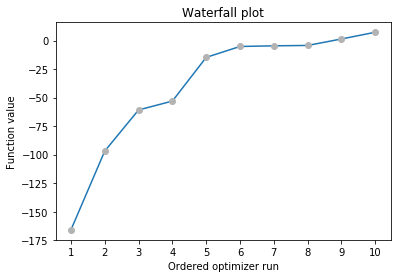

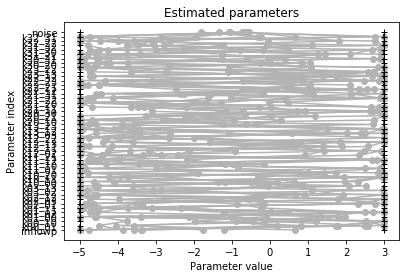

In [5]:
import pypesto.visualize

pypesto.visualize.waterfall(result)
pypesto.visualize.parameters(result)

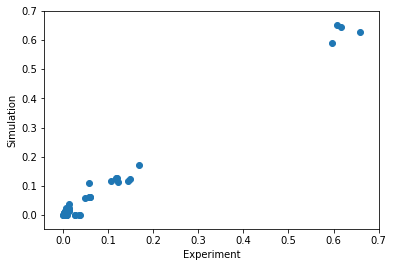

In [6]:
df = obj.simulations_to_measurement_df(result.optimize_result.get_for_key('x')[0])
plt.xlabel("Experiment")
plt.ylabel("Simulation")
plt.scatter(importer.measurement_df['measurement'], df['measurement'])

In [ ]:
edatas_sim = obj.simulate(x_bst)
df_sim = importer.to_measurement_df(edatas_sim)
plot_simulation(manager.measurement_df, [df_sim])